# Case Study: Predicting Medical Charges Using Linear Regression

In [1]:
# importing Libraries
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Data Preprocessing

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

In [9]:
# Drop any duplicate rows
df = df.drop_duplicates()

In [10]:
df.shape

(1337, 7)

# LabelEncoding
Converting the categorical columns to numerical columns by using Label Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()

df['sex']= le.fit_transform(df['sex'])
df['smoker']= le.fit_transform(df['smoker'])
df['region']= le.fit_transform(df['region'])

print(df)

      age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1337 rows x 7 columns]


C:\Users\Madiha\AppData\Local\Temp\ipykernel_11056\1953417817.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex']= le.fit_transform(df['sex'])
C:\Users\Madiha\AppData\Local\Temp\ipykernel_11056\1953417817.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoker']= le.fit_transform(df['smoker'])
C:\Users\Madiha\AppData\Local\Temp\ipykernel_11056\1953417817.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

# Exploratory Data Analysis(EDA)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

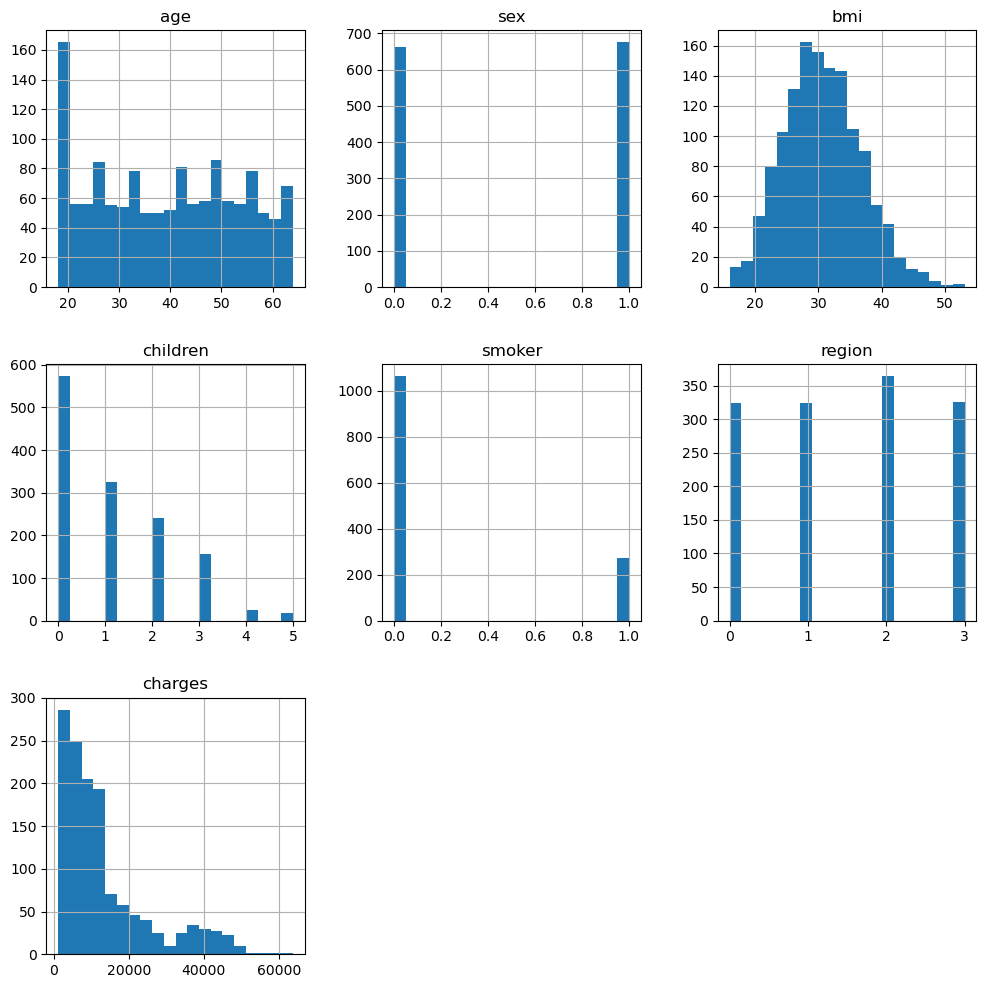

In [14]:
df.hist(figsize=(12, 12), bins=20)
plt.show()

In [15]:
corre=df.corr()
corre

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.001626,0.298308
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.004936,0.058044
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.157574,0.198401
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,-0.002358,0.787234
region,0.001626,0.004936,0.157574,0.016258,-0.002358,1.000000,-0.006547
charges,0.298308,0.058044,0.198401,0.067389,0.787234,-0.006547,1.000000


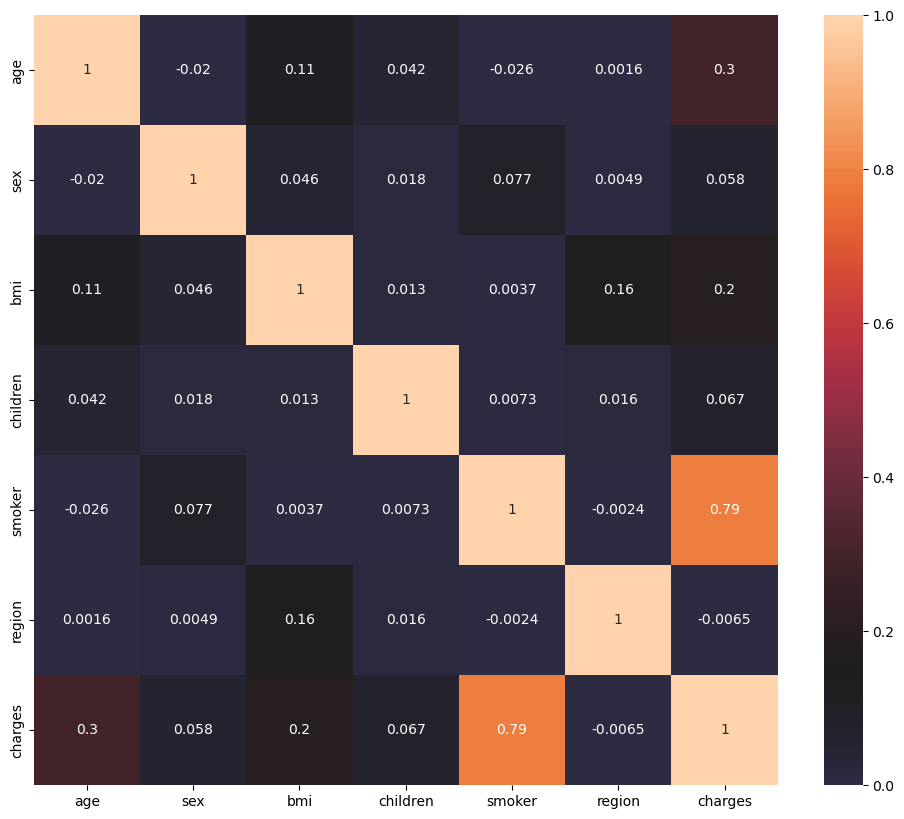

In [16]:
plt.figure(figsize=(12,10))
heatmapp=sns.heatmap(corre, annot=True, vmin=0, vmax=1, center=.15)

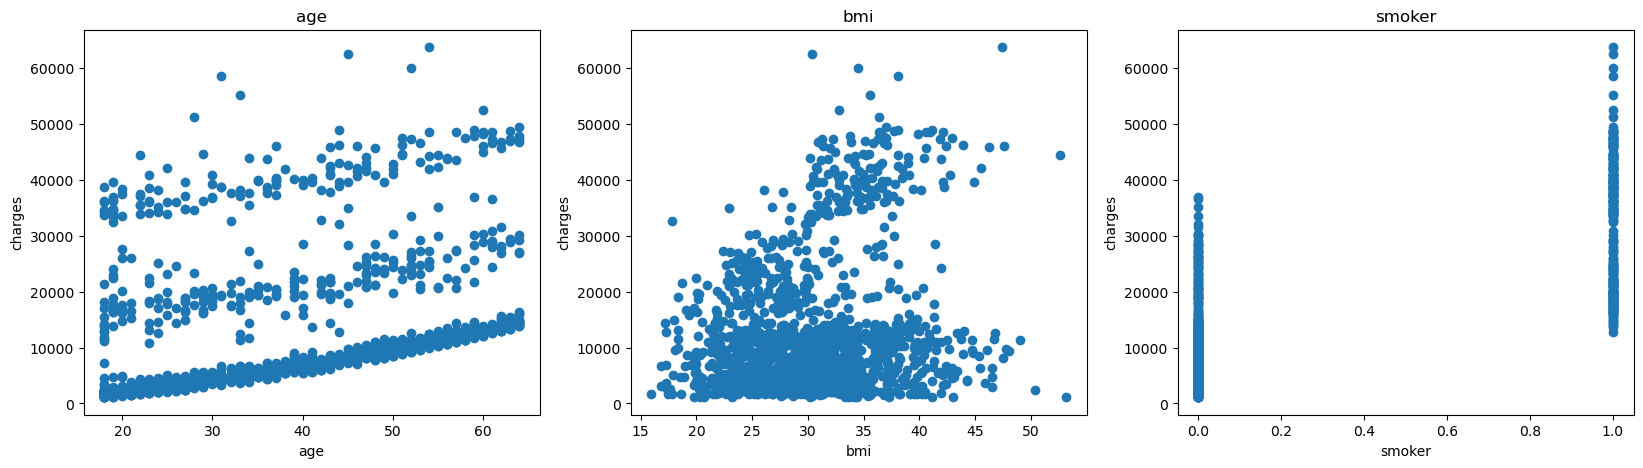

In [17]:
plt.figure(figsize=(20, 5))

features = ['age', 'bmi', 'smoker']
target = df['charges']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('charges')

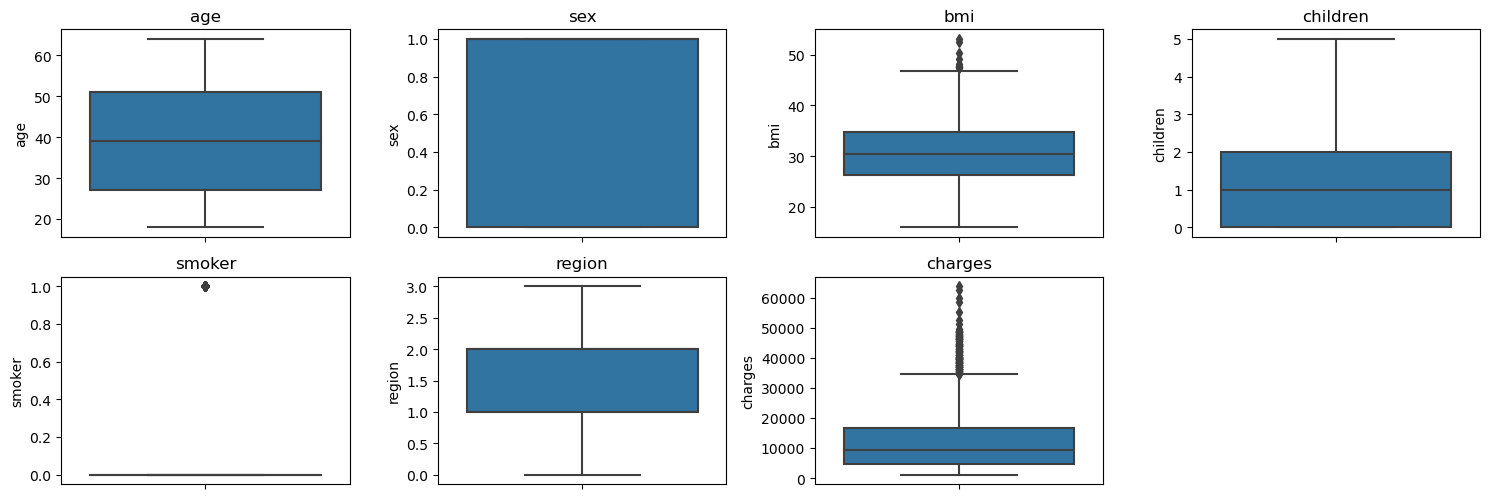

In [18]:
# Boxplots to visualize outliers in the dataset
plt.figure(figsize=(15, 10))

# Creating a boxplot for each feature in the DataFrame
for i, column in enumerate(df.columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

# Normalizing and Standardizing

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [26]:
# standardizing age and bmi
standard_scaler = StandardScaler()
df[['age','bmi']]= standard_scaler.fit_transform(df[['age','bmi']])

# normalizing charges
minmax_scaler= MinMaxScaler()
df['charges']= minmax_scaler.fit_transform(df[['charges']])

df.head()

C:\Users\Madiha\AppData\Local\Temp\ipykernel_11056\715068107.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['age','bmi']]= standard_scaler.fit_transform(df[['age','bmi']])
C:\Users\Madiha\AppData\Local\Temp\ipykernel_11056\715068107.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['charges']= minmax_scaler.fit_transform(df[['charges']])


,age,sex,bmi,children,smoker,region,charges
0,-1.440418,0,-0.453160,0,1,3,0.251611
1,-1.511647,1,0.509422,1,0,2,0.009636
2,-0.799350,1,0.383155,3,0,2,0.053115
3,-0.443201,1,-1.305052,0,0,1,0.333010
4,-0.514431,1,-0.292456,0,0,1,0.043816


# Model Development

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = df.drop(['charges'], axis=1) #labels
y = df['charges'] #features


In [22]:
X.head(3)

,age,sex,bmi,children,smoker,region
0,19,0,27.90,0,1,3
1,18,1,33.77,1,0,2
2,28,1,33.00,3,0,2


In [23]:
y.head(3)

0    16884.9240
1     1725.5523
2     4449.4620
Name: charges, dtype: float64

In [24]:
# Splitting the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, you can print the shapes of the resulting datasets to verify the split
print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)

Training set shape (X_train, y_train): (1069, 6) (1069,)
Testing set shape (X_test, y_test): (268, 6) (268,)


# Linear Regression Model

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Selecting the features and target variable
X = df[['age', 'bmi', 'smoker']]
y = df['charges']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared error:",round(r2*100,3),'%')

Mean Squared Error: 0.009131980578489133
R-squared error: 80.495 %


# Cross-validation on the linear regression mode

In [30]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, r2_score, mean_squared_error

In [32]:
lm = LinearRegression()
scores = cross_val_score(model, X,y, scoring='r2', cv=5)
scores 

array([0.76170322, 0.70980997, 0.77139554, 0.72830637, 0.75328972])

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

In [36]:
# Manual implementation of cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X):
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
    
     # Fit the model on the training set
    model.fit(X_train_cv, y_train_cv)

    # Predict on the test set
    y_pred_cv = model.predict(X_test_cv)

    # Calculate MSE and R² for each fold
    mse_scores.append(mean_squared_error(y_test_cv, y_pred_cv))
    r = r2_score(y_test_cv, y_pred_cv)
    r2_scores.append(r)
    
    # Calculate the average MSE, RMSE, and R² across all folds
print([round(value,4) for value in mse_scores],'\n', [round(value,4) for value in np.sqrt(mse_scores)],'\n',[round(value,4) for value in r2_scores])
cv_mse_mean = np.mean(mse_scores)
cv_rmse_mean = np.sqrt(cv_mse_mean)
cv_r2_mean = np.mean(r2_scores)

cv_mse_mean, cv_rmse_mean, cv_r2_mean

[0.0091, 0.0107, 0.009, 0.01, 0.0092] 
 [0.0956, 0.1035, 0.0948, 0.0998, 0.0961] 
 [0.805, 0.7113, 0.7502, 0.6705, 0.7452]


(0.009602034645117672, 0.09798997216612357, 0.7364231927400055)

# Model Interpretation

Interpreting the coefficients of the linear regression model.

In [38]:
# Extracting the coefficients of the model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])

# Displaying the coefficients
coefficients.sort_values(by='Coefficient', ascending=False)

,Coefficient
smoker,0.378965
age,0.058588
bmi,0.032096


Discussing the impact of smoker , age and bmi on medical charges

Smoker:  The smoker has strong correlation with charges. Being a smoker increases the medical charges, whereas being a non-smoker decreases the charges

Age: The age coefficient is positive, so it is directly proportional to medical charges. With the increase in age the medical charges also increase.

BMI: Similarly the positive coefficient for bmi, indicates that with the increase in bmi the medical charges also increases.

The other features, children, region and sex has minimal impact on medical charges. 